===========================

Next, using scCustomize, I will continue with qc metrics\
visualizations as violin plots etc.\
Especially, I will look at distribution of those metrics and\
and if necessary, I will filter out the outlier and low quality cells.\
After that, I will find clusters and annotate cell types.

I will use some command and analysis approaches from the PART_4A notebook\
such as scater::plotExplanatoryVariables, and scran::modelGeneVar. 

In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [3]:
my_seurat_extend_scCustomize_lib  <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/seuratExtend_scCustomize/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [4]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [5]:
.libPaths(new = my_seurat_extend_scCustomize_lib, include.site = FALSE)

In [6]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/seuratExtend_scCustomize/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [8]:
# my custom plotting configurations:

my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm")) 

my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [9]:
zheng_et_al_seurat <- 
    readRDS(here::here('r_objects', 'zheng_et_al_seurat_w_qc_metrics.RDS'))

In [10]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58528 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [11]:
pull_slot <- function(.data, slot_name) {
  slot(.data, rlang::as_string(rlang::ensym(slot_name)))
}

In [12]:
library(magrittr)

In [13]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% head()

,orig.ident,nCount_RNA,nFeature_RNA,_index,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,...,log10GenesPerUMI,percent_top50,percent_oxphos,percent_apop,percent_dna_repair,percent_ieg,percent_hemo,S.Score,G2M.Score,Phase
,<fct>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_,SeuratProject,1438,933,AAACCTGAGCGAAGGG-1-GSM5319988_sham2_,GSM5319988_sham2_,933,6.839476,1438,7.271704,25.03477,...,0.9405030,25.03477,3.477051,1.808067,0.9735744,2.016690,0.00000000,0.0111308855,0.056332806,G2M
AAACCTGAGCTAACAA-1-GSM5319988_sham2_,SeuratProject,1603,983,AAACCTGAGCTAACAA-1-GSM5319988_sham2_,GSM5319988_sham2_,983,6.891626,1603,7.380256,27.57330,...,0.9337334,27.57330,4.117280,2.620087,0.8733624,3.680599,0.00000000,-0.0003486534,0.007043034,G2M
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_,SeuratProject,2384,1298,AAACCTGAGGCTAGCA-1-GSM5319988_sham2_,GSM5319988_sham2_,1298,7.169350,2384,7.776955,27.68456,...,0.9218218,27.68456,3.859060,2.348993,1.3842282,4.026846,0.04194631,0.0334572949,0.025889747,S
AAACCTGAGGTGCACA-1-GSM5319988_sham2_,SeuratProject,2906,1309,AAACCTGAGGTGCACA-1-GSM5319988_sham2_,GSM5319988_sham2_,1309,7.177782,2906,7.974877,30.17894,...,0.8999924,30.17894,1.961459,2.821748,1.0667584,2.202340,0.03441156,0.0291239086,0.066760205,G2M
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_,SeuratProject,2928,1164,AAACCTGAGTTTAGGA-1-GSM5319988_sham2_,GSM5319988_sham2_,1164,7.060476,2928,7.982416,36.74863,...,0.8844339,36.74863,2.459016,1.741803,0.9562842,1.639344,0.00000000,0.0346371846,0.098559232,G2M
AAACCTGCAACACGCC-1-GSM5319988_sham2_,SeuratProject,2153,1175,AAACCTGCAACACGCC-1-GSM5319988_sham2_,GSM5319988_sham2_,1175,7.069874,2153,7.675082,29.95820,...,0.9210913,29.95820,3.483511,2.461681,1.0218300,1.904320,0.00000000,0.0250575633,0.026391835,G2M


In [14]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% colnames() %>% print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "status"                      "leiden"                     
[19] "_scvi_batch"                 "_scvi_labels"               
[21] "percent_mito"                "percent_ribo"               
[23] "percent_mito_ribo"           "log10GenesPerUMI"           
[25] "percent_top50"               "percent_oxphos"             
[27] "percent_apop"                "percent_dna_repair"         
[29] "percent_ieg"                 "percent_hemo"               
[31] "S.Score"           

In [15]:
zheng_et_al_seurat %>% use_series(sample) %>% table()

.
GSM5319987_sham1_ GSM5319988_sham2_ GSM5319989_sham3_ GSM5319990_MCAO1_ 
             8771              8540              9980             11772 
GSM5319991_MCAO2_ GSM5319992_MCAO3_ 
            11361              8104 

In [16]:
zheng_et_al_seurat %>% use_series(sample) %>% head()

AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 
                 "GSM5319988_sham2_"                  "GSM5319988_sham2_" 
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 
                 "GSM5319988_sham2_"                  "GSM5319988_sham2_" 
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGCAACACGCC-1-GSM5319988_sham2_ 
                 "GSM5319988_sham2_"                  "GSM5319988_sham2_"

In [17]:
zheng_et_al_seurat %>% extract2('sample') %>% head()

,sample
,<chr>
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_,GSM5319988_sham2_
AAACCTGAGCTAACAA-1-GSM5319988_sham2_,GSM5319988_sham2_
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_,GSM5319988_sham2_
AAACCTGAGGTGCACA-1-GSM5319988_sham2_,GSM5319988_sham2_
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_,GSM5319988_sham2_
AAACCTGCAACACGCC-1-GSM5319988_sham2_,GSM5319988_sham2_


In [18]:
zheng_et_al_seurat$leiden <- NULL

In [19]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% colnames() %>% print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "status"                      "_scvi_batch"                
[19] "_scvi_labels"                "percent_mito"               
[21] "percent_ribo"                "percent_mito_ribo"          
[23] "log10GenesPerUMI"            "percent_top50"              
[25] "percent_oxphos"              "percent_apop"               
[27] "percent_dna_repair"          "percent_ieg"                
[29] "percent_hemo"                "S.Score"                    
[31] "G2M.Score"         

In [20]:
zheng_et_al_sce <- as.SingleCellExperiment(x = zheng_et_al_seurat)

Warning message:
"Layer 'data' is empty"
Warning message:
"Layer 'scale.data' is empty"


In [21]:
zheng_et_al_sce

class: SingleCellExperiment 
dim: 19707 58528 
metadata(0):
assays(1): counts
rownames(19707): Xkr4 Gm1992 ... DHRSX CAAA01147332.1
rowData names(0):
colnames(58528): AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
  AAACCTGAGCTAACAA-1-GSM5319988_sham2_ ...
  TTTGTCAGTTACCGAT-1-GSM5319991_MCAO2_
  TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_
colData names(33): orig.ident nCount_RNA ... Phase ident
reducedDimNames(4): XPCA_ XSCVI_ XSCVIMDE_ XUMAP_
mainExpName: RNA
altExpNames(0):

In [22]:
options(repr.plot.width = 15, repr.plot.height = 15) 

In [23]:
p1 <- scater::plotHighestExprs(object = zheng_et_al_sce, exprs_values = 'counts')

In [24]:
# ggplot2::ggsave(filename = 'plotHighestExprs.png', plot = p1, path = here::here('r_objects'), width = 15, height = 15)

paste the output to markdown:

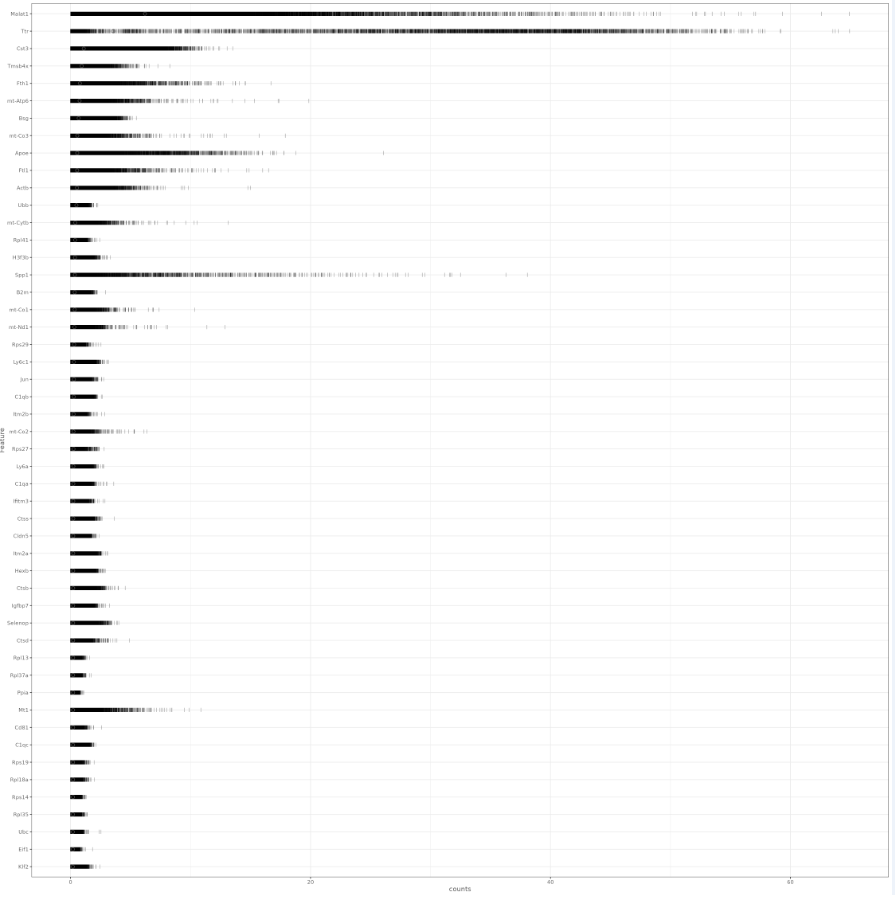

In [25]:
zheng_et_al_sce %>% slotNames()

[1] "int_elementMetadata" "int_colData"         "int_metadata"       
[4] "rowRanges"           "colData"             "assays"             
[7] "NAMES"               "elementMetadata"     "metadata"

In [26]:
zheng_et_al_sce %>% use_series(sample) %>% table()

.
GSM5319987_sham1_ GSM5319988_sham2_ GSM5319989_sham3_ GSM5319990_MCAO1_ 
             8771              8540              9980             11772 
GSM5319991_MCAO2_ GSM5319992_MCAO3_ 
            11361              8104 

In [27]:
zheng_et_al_sce %>% pull_slot(colData)

DataFrame with 58528 rows and 33 columns
                                        orig.ident nCount_RNA nFeature_RNA
                                          <factor>  <numeric>    <integer>
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ SeuratProject       1438          933
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ SeuratProject       1603          983
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ SeuratProject       2384         1298
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ SeuratProject       2906         1309
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ SeuratProject       2928         1164
...                                            ...        ...          ...
TTTGTCAGTCTCATCC-1-GSM5319991_MCAO2_ SeuratProject       4165         1608
TTTGTCAGTGCGCTTG-1-GSM5319991_MCAO2_ SeuratProject       1602          957
TTTGTCAGTGTGCCTG-1-GSM5319991_MCAO2_ SeuratProject       1911         1053
TTTGTCAGTTACCGAT-1-GSM5319991_MCAO2_ SeuratProject      23372         5947
TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_ SeuratProject       23

In [28]:
zheng_et_al_sce

class: SingleCellExperiment 
dim: 19707 58528 
metadata(0):
assays(1): counts
rownames(19707): Xkr4 Gm1992 ... DHRSX CAAA01147332.1
rowData names(0):
colnames(58528): AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
  AAACCTGAGCTAACAA-1-GSM5319988_sham2_ ...
  TTTGTCAGTTACCGAT-1-GSM5319991_MCAO2_
  TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_
colData names(33): orig.ident nCount_RNA ... Phase ident
reducedDimNames(4): XPCA_ XSCVI_ XSCVIMDE_ XUMAP_
mainExpName: RNA
altExpNames(0):

In [29]:
zheng_et_al_sce %>% pull_slot(colData) %>% colnames()

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "X_index"                    
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "status"                      "X_scvi_batch"               
[19] "X_scvi_labels"               "percent_mito"               
[21] "percent_ribo"                "percent_mito_ribo"          
[23] "log10GenesPerUMI"            "percent_top50"              
[25] "percent_oxphos"              "percent_apop"               
[27] "percent_dna_repair"          "percent_ieg"                
[29] "percent_hemo"                "S.Score"                    
[31] "G2M.Score"                   "Phase"                      
[33] "ident"

In [30]:
zheng_et_al_sce <- scater::logNormCounts(zheng_et_al_sce)

In [31]:
variables_selected <- zheng_et_al_sce %>% pull_slot(colData) %>% colnames()

In [32]:
variables_selected %>% print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "X_index"                    
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "status"                      "X_scvi_batch"               
[19] "X_scvi_labels"               "percent_mito"               
[21] "percent_ribo"                "percent_mito_ribo"          
[23] "log10GenesPerUMI"            "percent_top50"              
[25] "percent_oxphos"              "percent_apop"               
[27] "percent_dna_repair"          "percent_ieg"                
[29] "percent_hemo"                "S.Score"                    
[31] "G2M.Score"         

In [33]:
ls()

[1] "my_colours"                       "my_margin"                       
[3] "my_seurat_extend_scCustomize_lib" "my_theme"                        
[5] "p1"                               "pull_slot"                       
[7] "variables_selected"               "zheng_et_al_sce"                 
[9] "zheng_et_al_seurat"

IMPORTANT:

Remove index column !!!!

In [34]:
variables_selected <- setdiff(variables_selected, 'X_index')

In [36]:
variables_selected %>% print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "sample"                     
 [5] "n_genes_by_counts"           "log1p_n_genes_by_counts"    
 [7] "total_counts"                "log1p_total_counts"         
 [9] "pct_counts_in_top_50_genes"  "pct_counts_in_top_100_genes"
[11] "pct_counts_in_top_200_genes" "pct_counts_in_top_500_genes"
[13] "n_genes"                     "doublet_score"              
[15] "predicted_doublet"           "status"                     
[17] "X_scvi_batch"                "X_scvi_labels"              
[19] "percent_mito"                "percent_ribo"               
[21] "percent_mito_ribo"           "log10GenesPerUMI"           
[23] "percent_top50"               "percent_oxphos"             
[25] "percent_apop"                "percent_dna_repair"         
[27] "percent_ieg"                 "percent_hemo"               
[29] "S.Score"                     "G2M.Score"                  
[31] "Phase"             

In [39]:
vars <- scater::getVarianceExplained(zheng_et_al_sce,
    variables= variables_selected)

Warning message in beachmat_internal_FUN(X[[3]], ...):
"ignoring 'orig.ident' with fewer than 2 unique levels"
Warning message in beachmat_internal_FUN(X[[3]], ...):
"ignoring 'X_scvi_labels' with fewer than 2 unique levels"
Warning message in beachmat_internal_FUN(X[[3]], ...):
"ignoring 'ident' with fewer than 2 unique levels"


In [40]:
head(vars)

,orig.ident,nCount_RNA,nFeature_RNA,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,...,percent_oxphos,percent_apop,percent_dna_repair,percent_ieg,percent_hemo,S.Score,G2M.Score,Phase,ident,sizeFactor
Xkr4,NA,0.0080517713,1.039126e-02,0.003060891,1.039609e-02,9.820799e-03,0.0080528020,0.009788231,0.001826120,8.316175e-04,...,1.070772e-07,0.0090159471,5.721480e-04,0.0077798384,1.052514e-05,3.080679e-04,8.206155e-05,0.0005068128,NA,0.0080517713
Gm1992,NA,0.0355131658,3.555222e-03,0.008035333,3.561081e-03,2.889272e-03,0.0355168141,0.027413406,0.072792509,7.067491e-02,...,8.935094e-02,0.0339370590,3.221291e-05,0.0278582971,2.661594e-05,1.363208e-05,1.058200e-03,0.0002788360,NA,0.0355131658
Rp1,NA,0.0045373194,4.634516e-05,0.029863802,4.617546e-05,2.244388e-05,0.0045368211,0.003490288,0.028691864,3.160002e-02,...,4.868199e-07,0.0044357656,1.225204e-02,0.0012482371,9.281117e-05,1.254109e-05,7.810088e-05,0.0017299233,NA,0.0045373194
Sox17,NA,3.6142745669,8.171475e-01,2.636663415,8.173931e-01,5.254359e-01,3.6143560734,4.358940120,12.750660858,1.360688e+01,...,1.552565e-01,5.0798524116,1.622622e+00,0.2849845062,2.790733e-02,6.327440e-04,4.051492e-03,0.2095478165,NA,3.6142745669
Gm37323,NA,0.0007794068,5.885347e-05,0.007504982,5.894109e-05,3.355127e-05,0.0007794696,0.001035197,0.002723051,3.011935e-03,...,1.142129e-04,0.0053776475,1.199436e-05,0.0006218990,5.260949e-06,8.006333e-04,4.511680e-04,0.0056810103,NA,0.0007794068
Mrpl15,NA,0.4208533425,7.473401e-01,0.093337364,7.472822e-01,8.128922e-01,0.4208430072,0.483621077,0.482949457,4.820640e-01,...,1.950009e-01,0.0001119542,2.711432e-01,0.0001262322,1.383870e-02,6.520939e-02,8.327528e-03,0.0108932896,NA,0.4208533425


In [54]:
lapply(list(colnames(vars)), function(x) colSums(is.na(vars[,x]))) %>% print()

[[1]]
                 orig.ident                  nCount_RNA 
                      19707                           0 
               nFeature_RNA                      sample 
                          0                           0 
          n_genes_by_counts     log1p_n_genes_by_counts 
                          0                           0 
               total_counts          log1p_total_counts 
                          0                           0 
 pct_counts_in_top_50_genes pct_counts_in_top_100_genes 
                          0                           0 
pct_counts_in_top_200_genes pct_counts_in_top_500_genes 
                          0                           0 
                    n_genes               doublet_score 
                          0                           0 
          predicted_doublet                      status 
                          0                           0 
               X_scvi_batch               X_scvi_labels 
                         

In [55]:
colnames(vars) %>% dput()

c("orig.ident", "nCount_RNA", "nFeature_RNA", "sample", "n_genes_by_counts", 
"log1p_n_genes_by_counts", "total_counts", "log1p_total_counts", 
"pct_counts_in_top_50_genes", "pct_counts_in_top_100_genes", 
"pct_counts_in_top_200_genes", "pct_counts_in_top_500_genes", 
"n_genes", "doublet_score", "predicted_doublet", "status", "X_scvi_batch", 
"X_scvi_labels", "percent_mito", "percent_ribo", "percent_mito_ribo", 
"log10GenesPerUMI", "percent_top50", "percent_oxphos", "percent_apop", 
"percent_dna_repair", "percent_ieg", "percent_hemo", "S.Score", 
"G2M.Score", "Phase", "ident", "sizeFactor")


In [59]:
vars[, colnames(vars) %in% c("orig.ident", "ident", "X_scvi_labels")] %>% head()

,orig.ident,X_scvi_labels,ident
Xkr4,NA,NA,NA
Gm1992,NA,NA,NA
Rp1,NA,NA,NA
Sox17,NA,NA,NA
Gm37323,NA,NA,NA
Mrpl15,NA,NA,NA


In [60]:
vars[, !colnames(vars) %in% c("orig.ident", "ident", "X_scvi_labels")] %>% head()

,nCount_RNA,nFeature_RNA,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,percent_top50,percent_oxphos,percent_apop,percent_dna_repair,percent_ieg,percent_hemo,S.Score,G2M.Score,Phase,sizeFactor
Xkr4,0.0080517713,1.039126e-02,0.003060891,1.039609e-02,9.820799e-03,0.0080528020,0.009788231,0.001826120,8.316175e-04,4.452364e-05,...,0.001826422,1.070772e-07,0.0090159471,5.721480e-04,0.0077798384,1.052514e-05,3.080679e-04,8.206155e-05,0.0005068128,0.0080517713
Gm1992,0.0355131658,3.555222e-03,0.008035333,3.561081e-03,2.889272e-03,0.0355168141,0.027413406,0.072792509,7.067491e-02,6.602594e-02,...,0.072799355,8.935094e-02,0.0339370590,3.221291e-05,0.0278582971,2.661594e-05,1.363208e-05,1.058200e-03,0.0002788360,0.0355131658
Rp1,0.0045373194,4.634516e-05,0.029863802,4.617546e-05,2.244388e-05,0.0045368211,0.003490288,0.028691864,3.160002e-02,3.121816e-02,...,0.028689453,4.868199e-07,0.0044357656,1.225204e-02,0.0012482371,9.281117e-05,1.254109e-05,7.810088e-05,0.0017299233,0.0045373194
Sox17,3.6142745669,8.171475e-01,2.636663415,8.173931e-01,5.254359e-01,3.6143560734,4.358940120,12.750660858,1.360688e+01,1.304506e+01,...,12.751043210,1.552565e-01,5.0798524116,1.622622e+00,0.2849845062,2.790733e-02,6.327440e-04,4.051492e-03,0.2095478165,3.6142745669
Gm37323,0.0007794068,5.885347e-05,0.007504982,5.894109e-05,3.355127e-05,0.0007794696,0.001035197,0.002723051,3.011935e-03,3.582141e-03,...,0.002723359,1.142129e-04,0.0053776475,1.199436e-05,0.0006218990,5.260949e-06,8.006333e-04,4.511680e-04,0.0056810103,0.0007794068
Mrpl15,0.4208533425,7.473401e-01,0.093337364,7.472822e-01,8.128922e-01,0.4208430072,0.483621077,0.482949457,4.820640e-01,5.131162e-01,...,0.482952288,1.950009e-01,0.0001119542,2.711432e-01,0.0001262322,1.383870e-02,6.520939e-02,8.327528e-03,0.0108932896,0.4208533425


In [62]:
vars %>% ncol()

[1] 30

In [61]:
vars <- vars[, !colnames(vars) %in% c("orig.ident", "ident", "X_scvi_labels")]

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


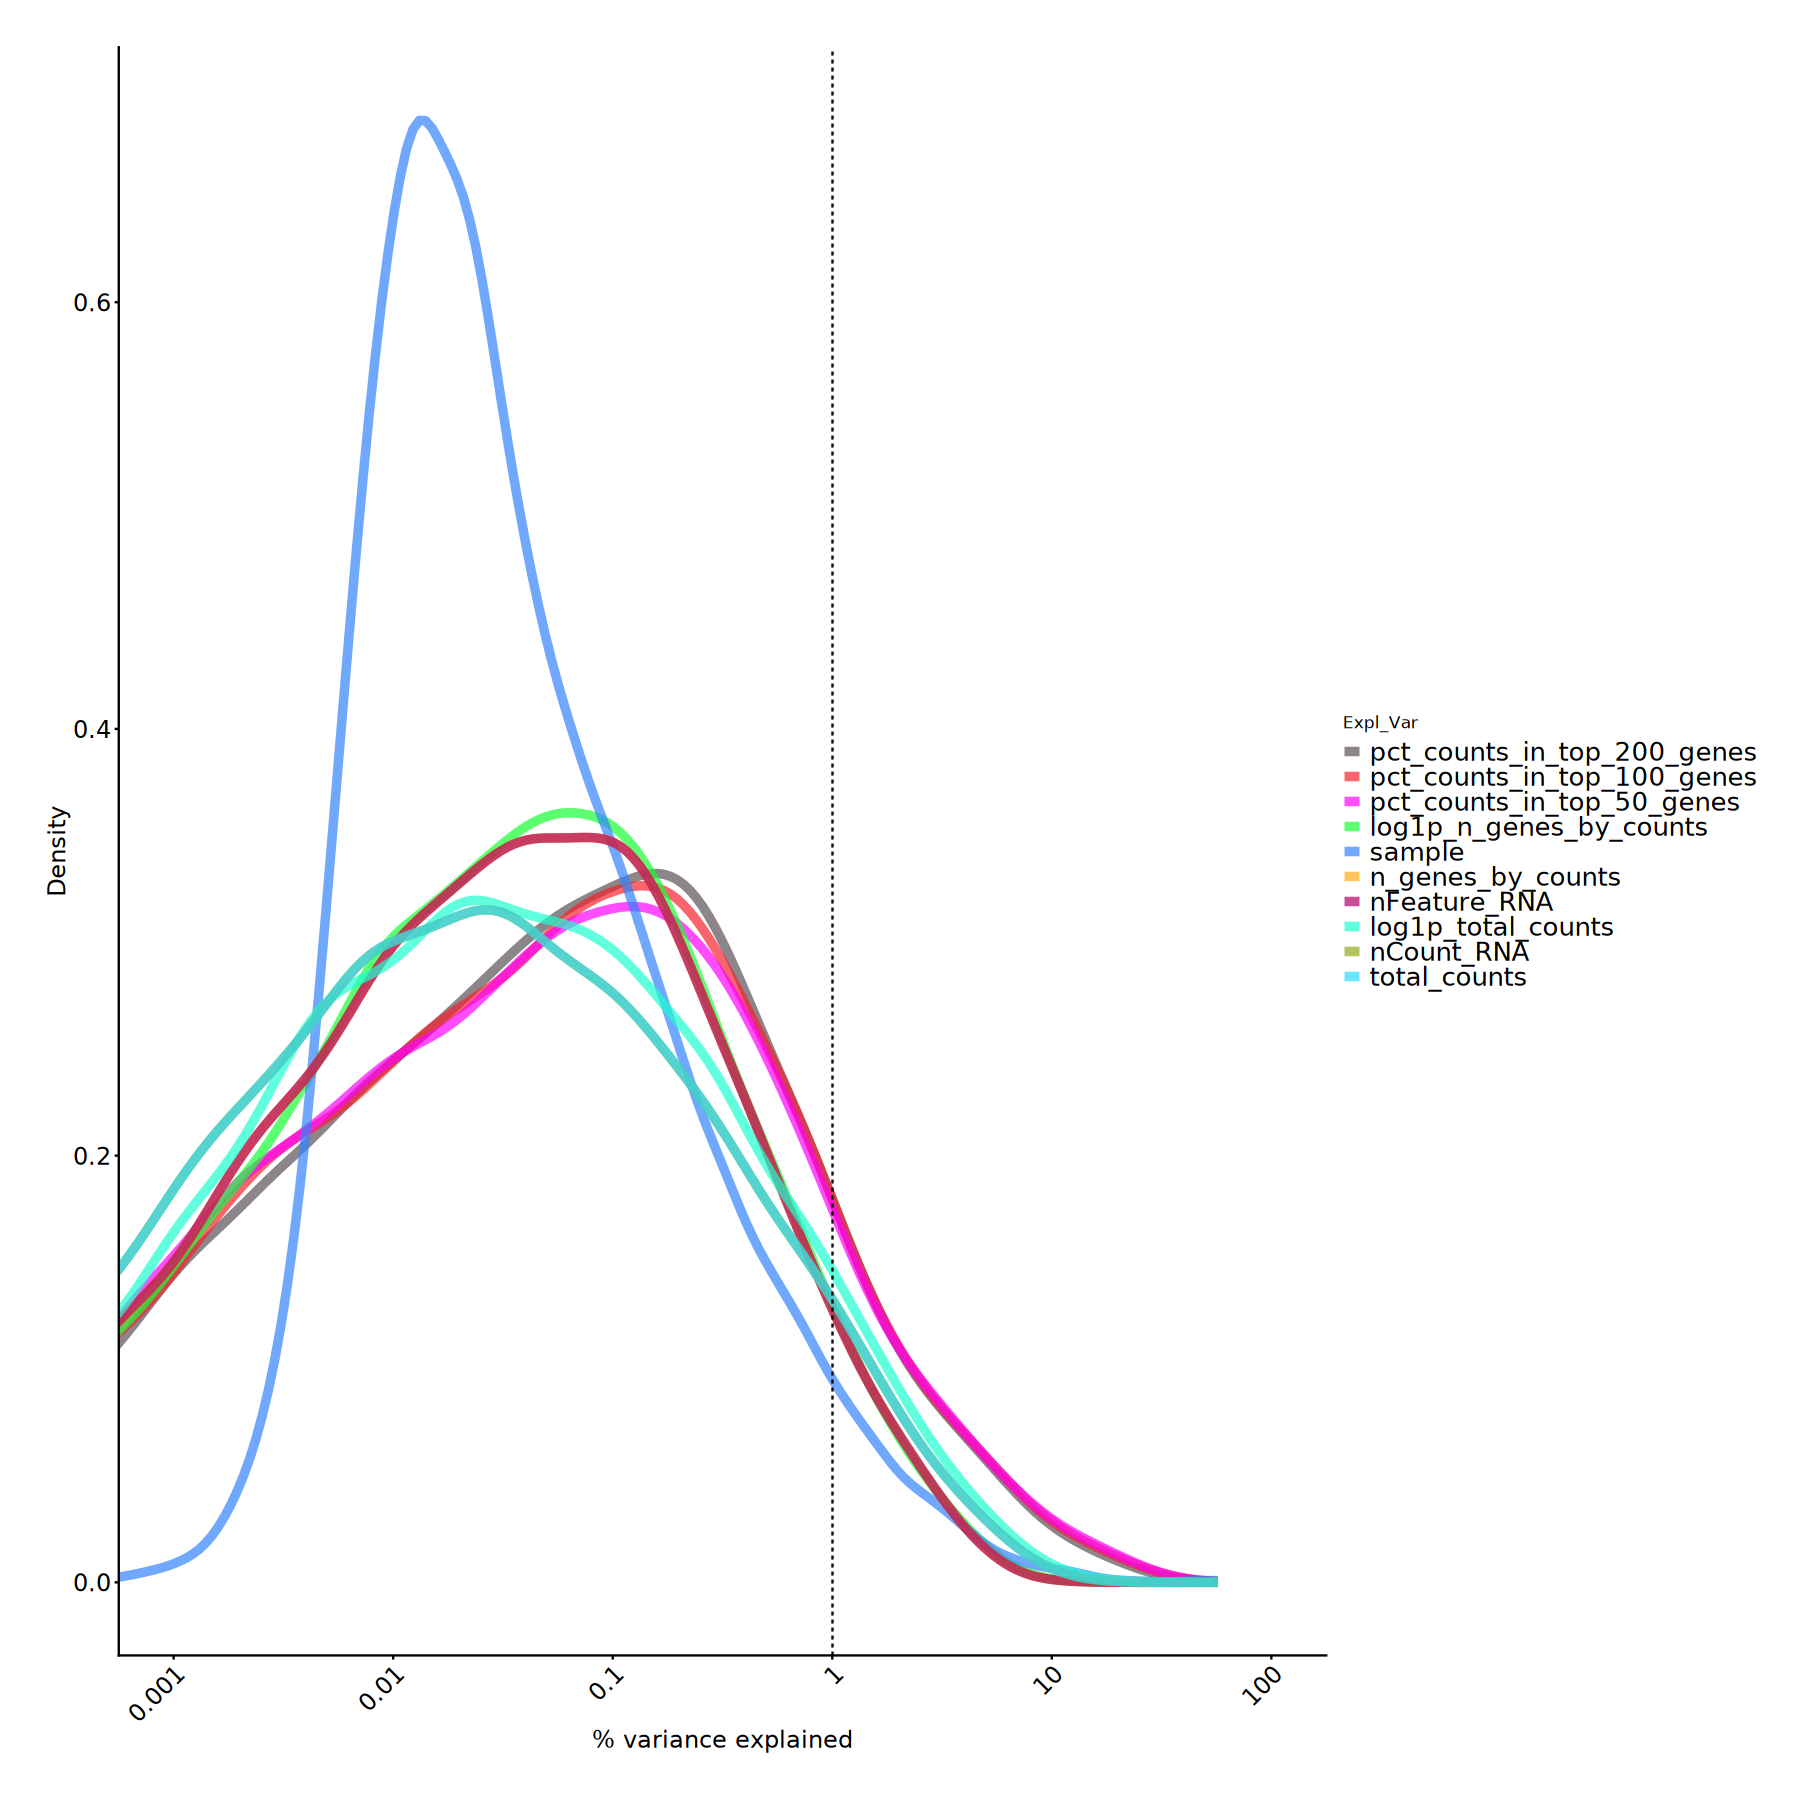

In [66]:
scater::plotExplanatoryVariables(vars[, 1:10], nvars_to_plot = Inf) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10(breaks = 10^(-3:2), labels = c(0.001, 0.01, 0.1, :
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_density()`)."


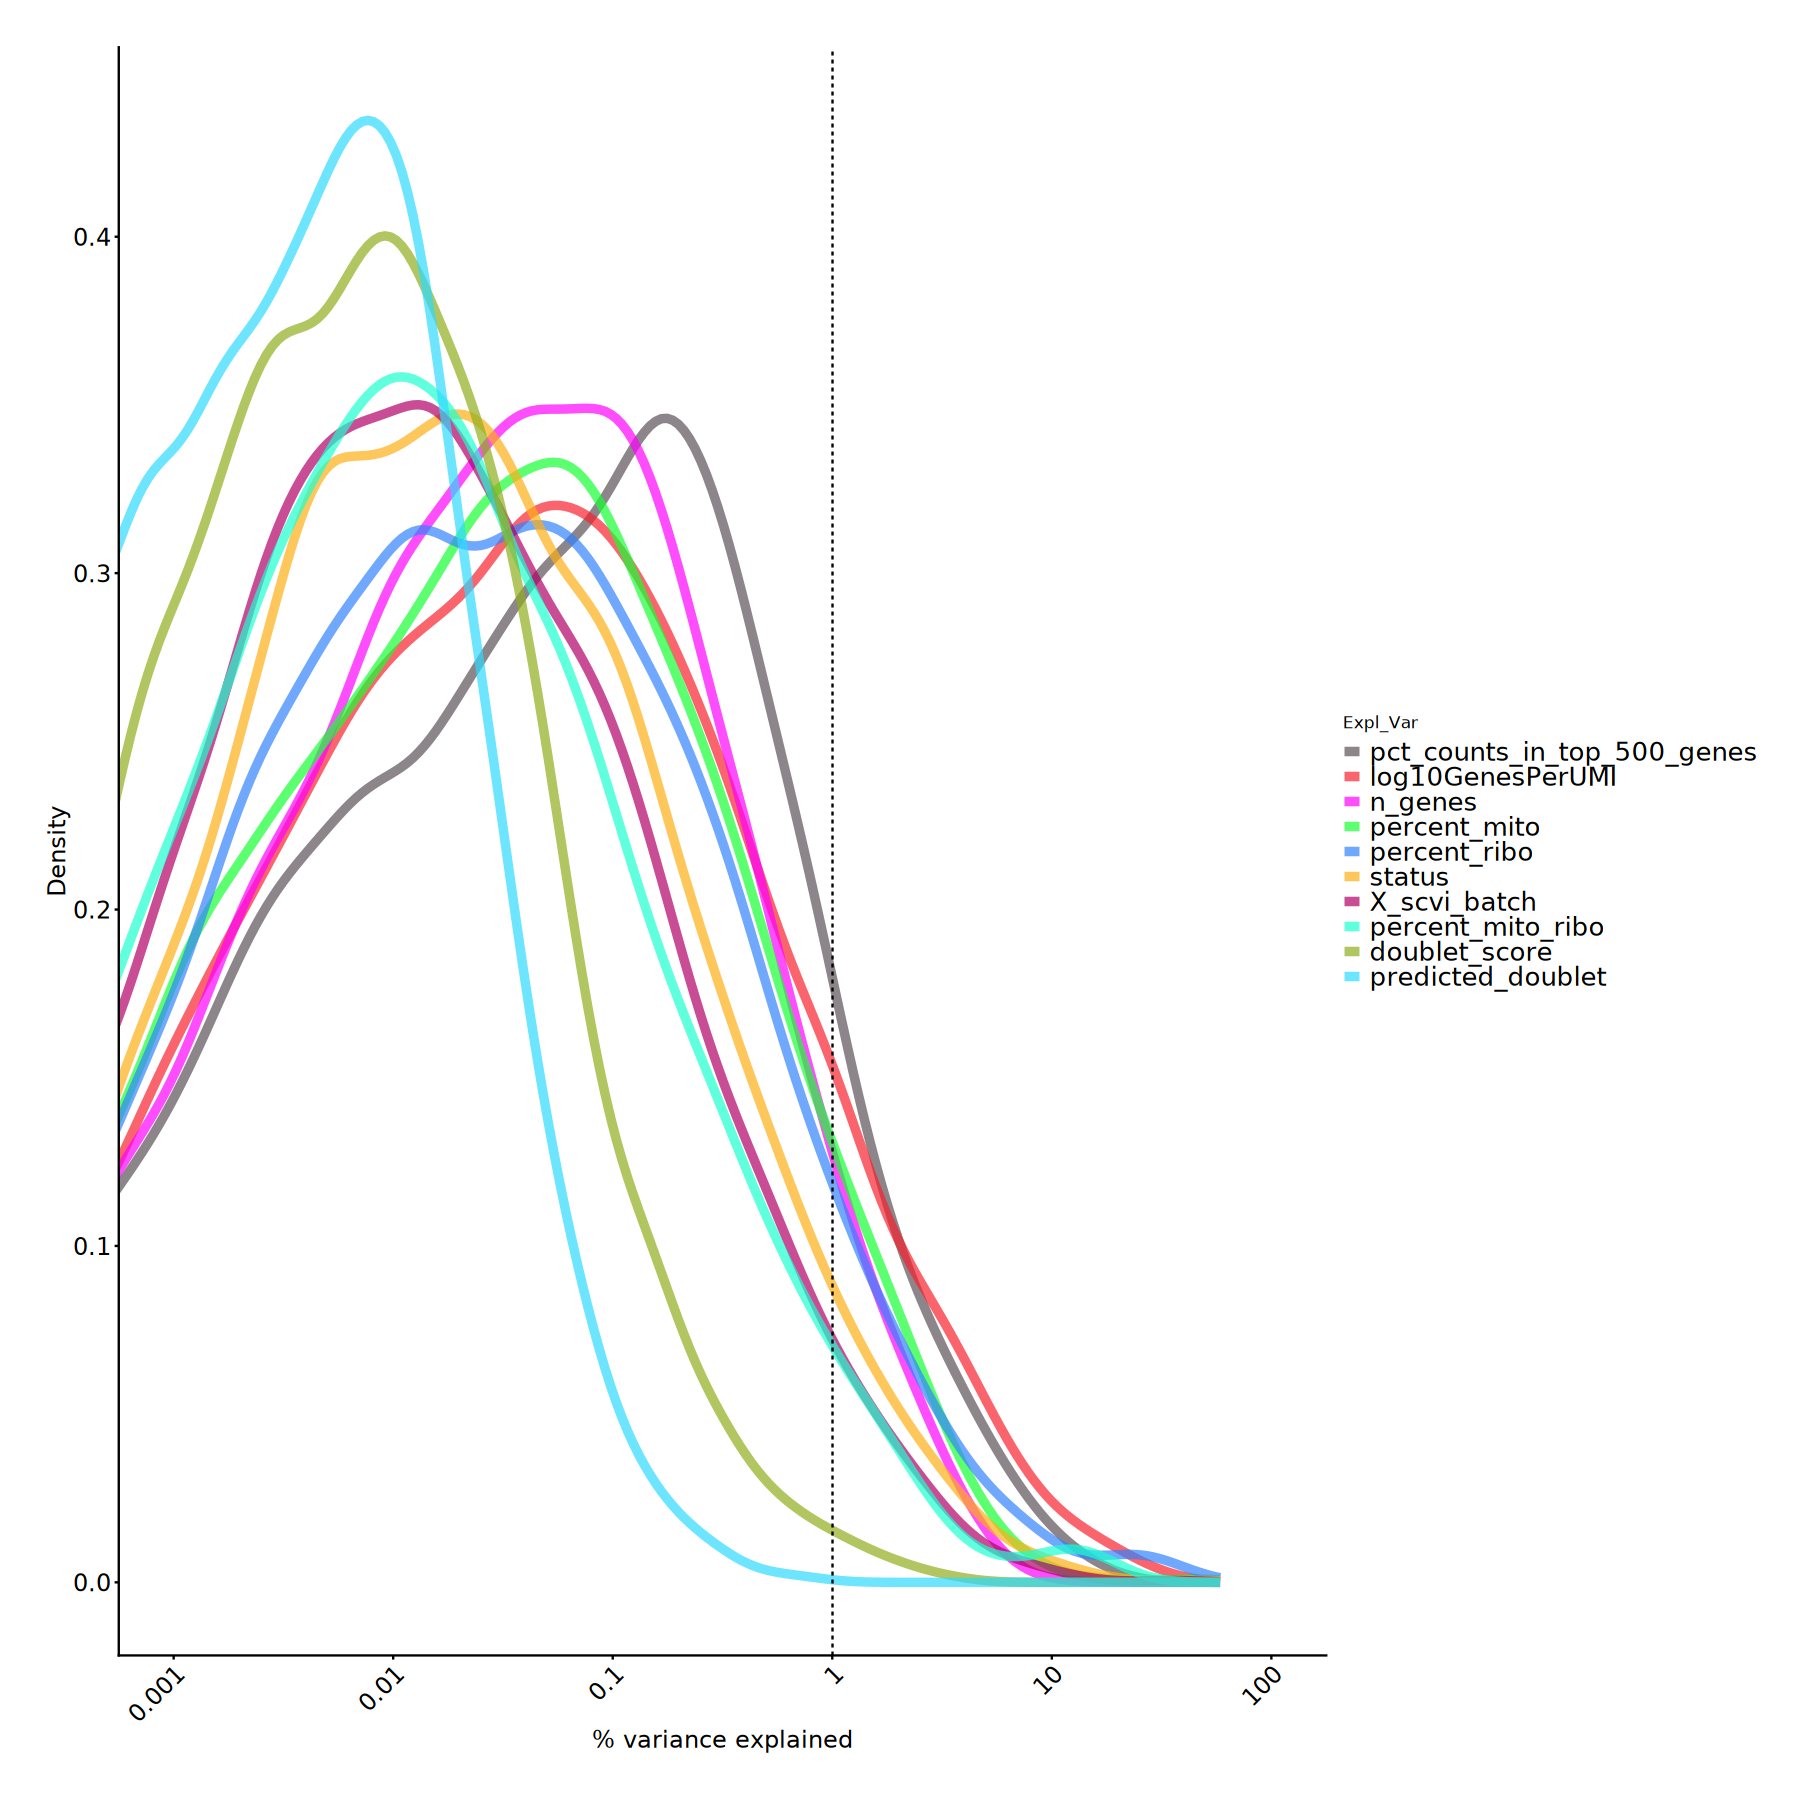

In [67]:
scater::plotExplanatoryVariables(vars[, 11:20], nvars_to_plot = Inf) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


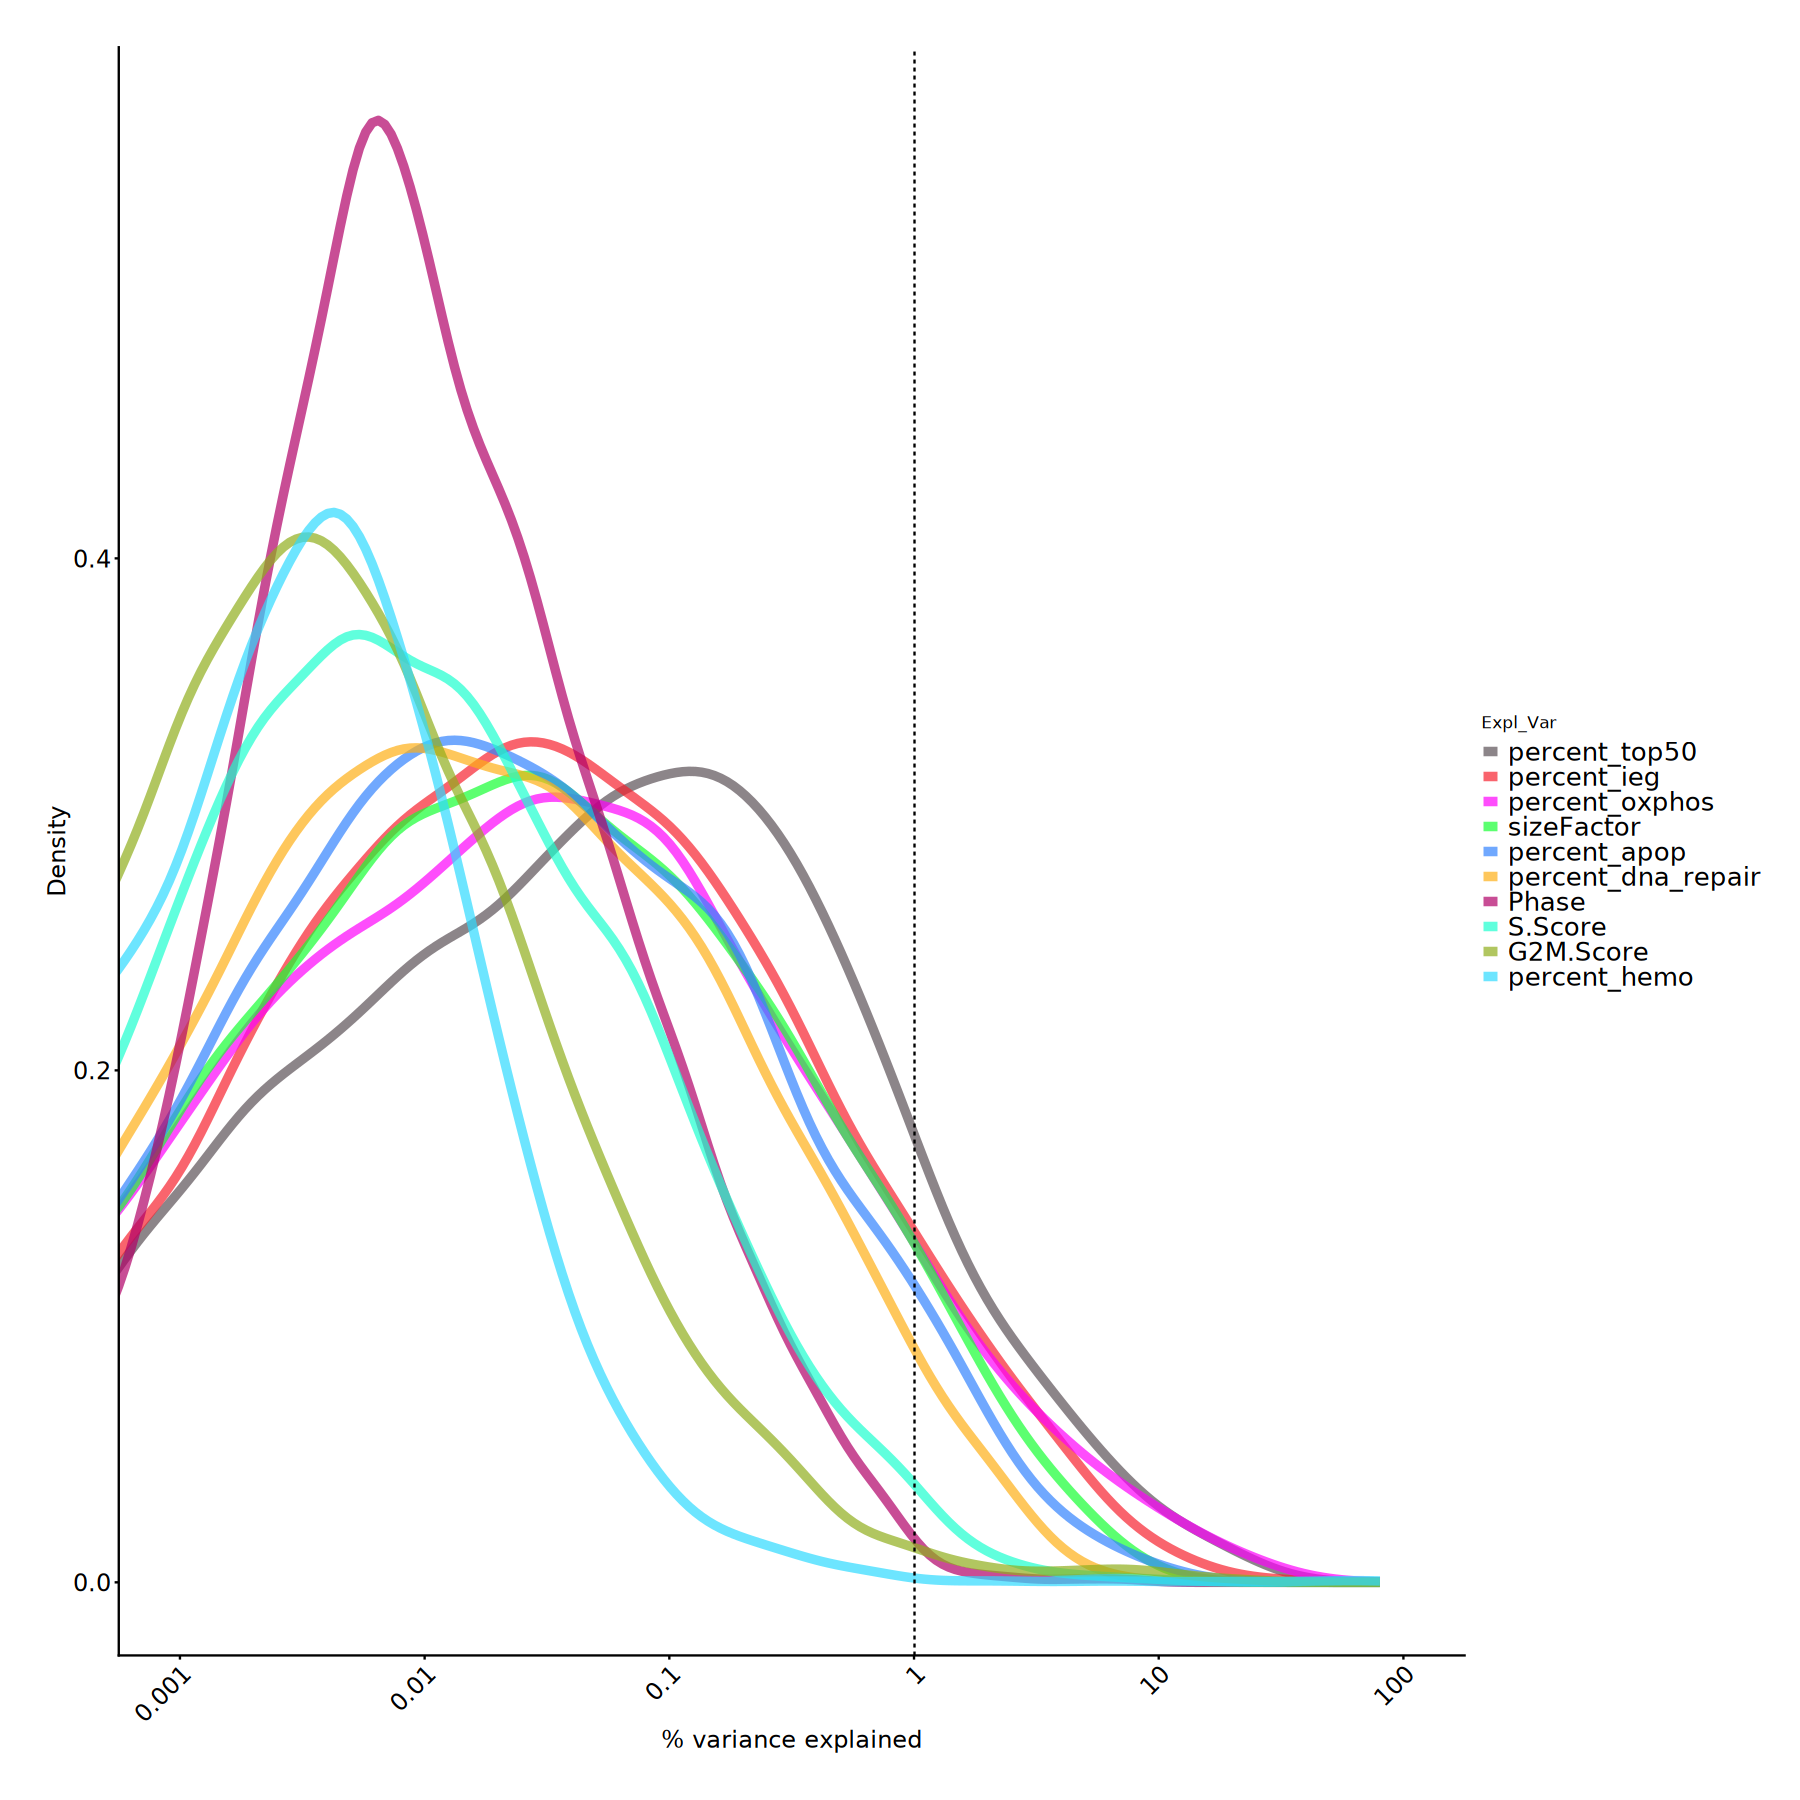

In [68]:
scater::plotExplanatoryVariables(vars[, 21:30], nvars_to_plot = Inf) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


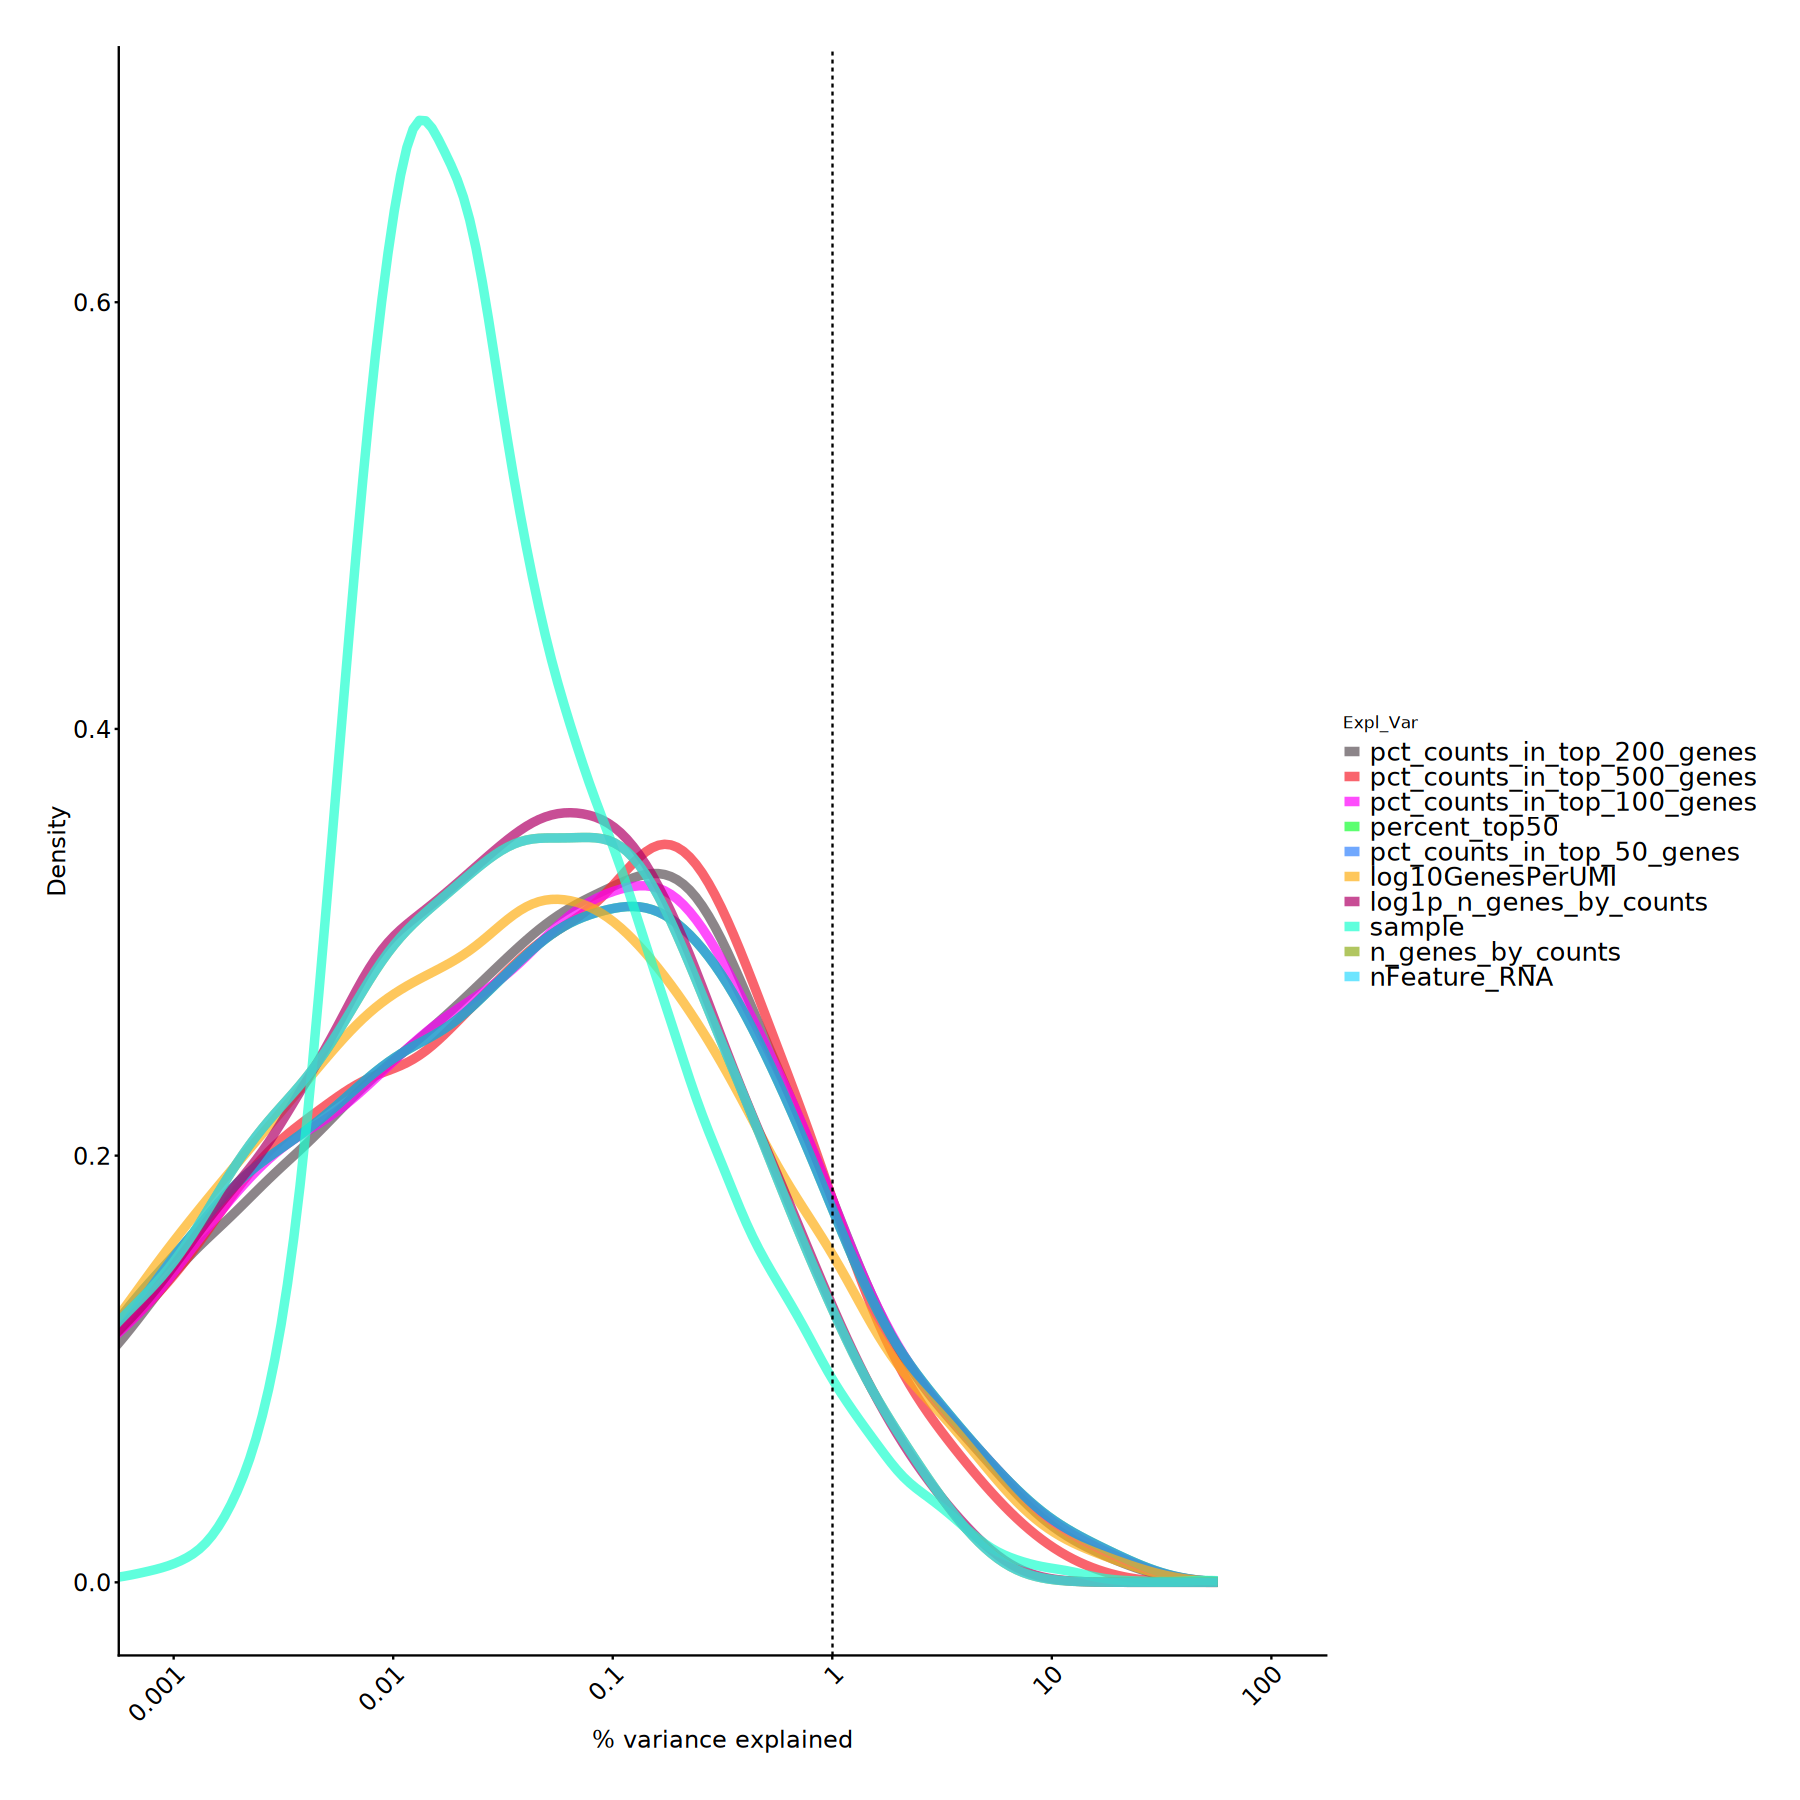

In [77]:
# view top 10:

scater::plotExplanatoryVariables(vars, nvars_to_plot = 10) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10(breaks = 10^(-3:2), labels = c(0.001, 0.01, 0.1, :
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_density()`)."


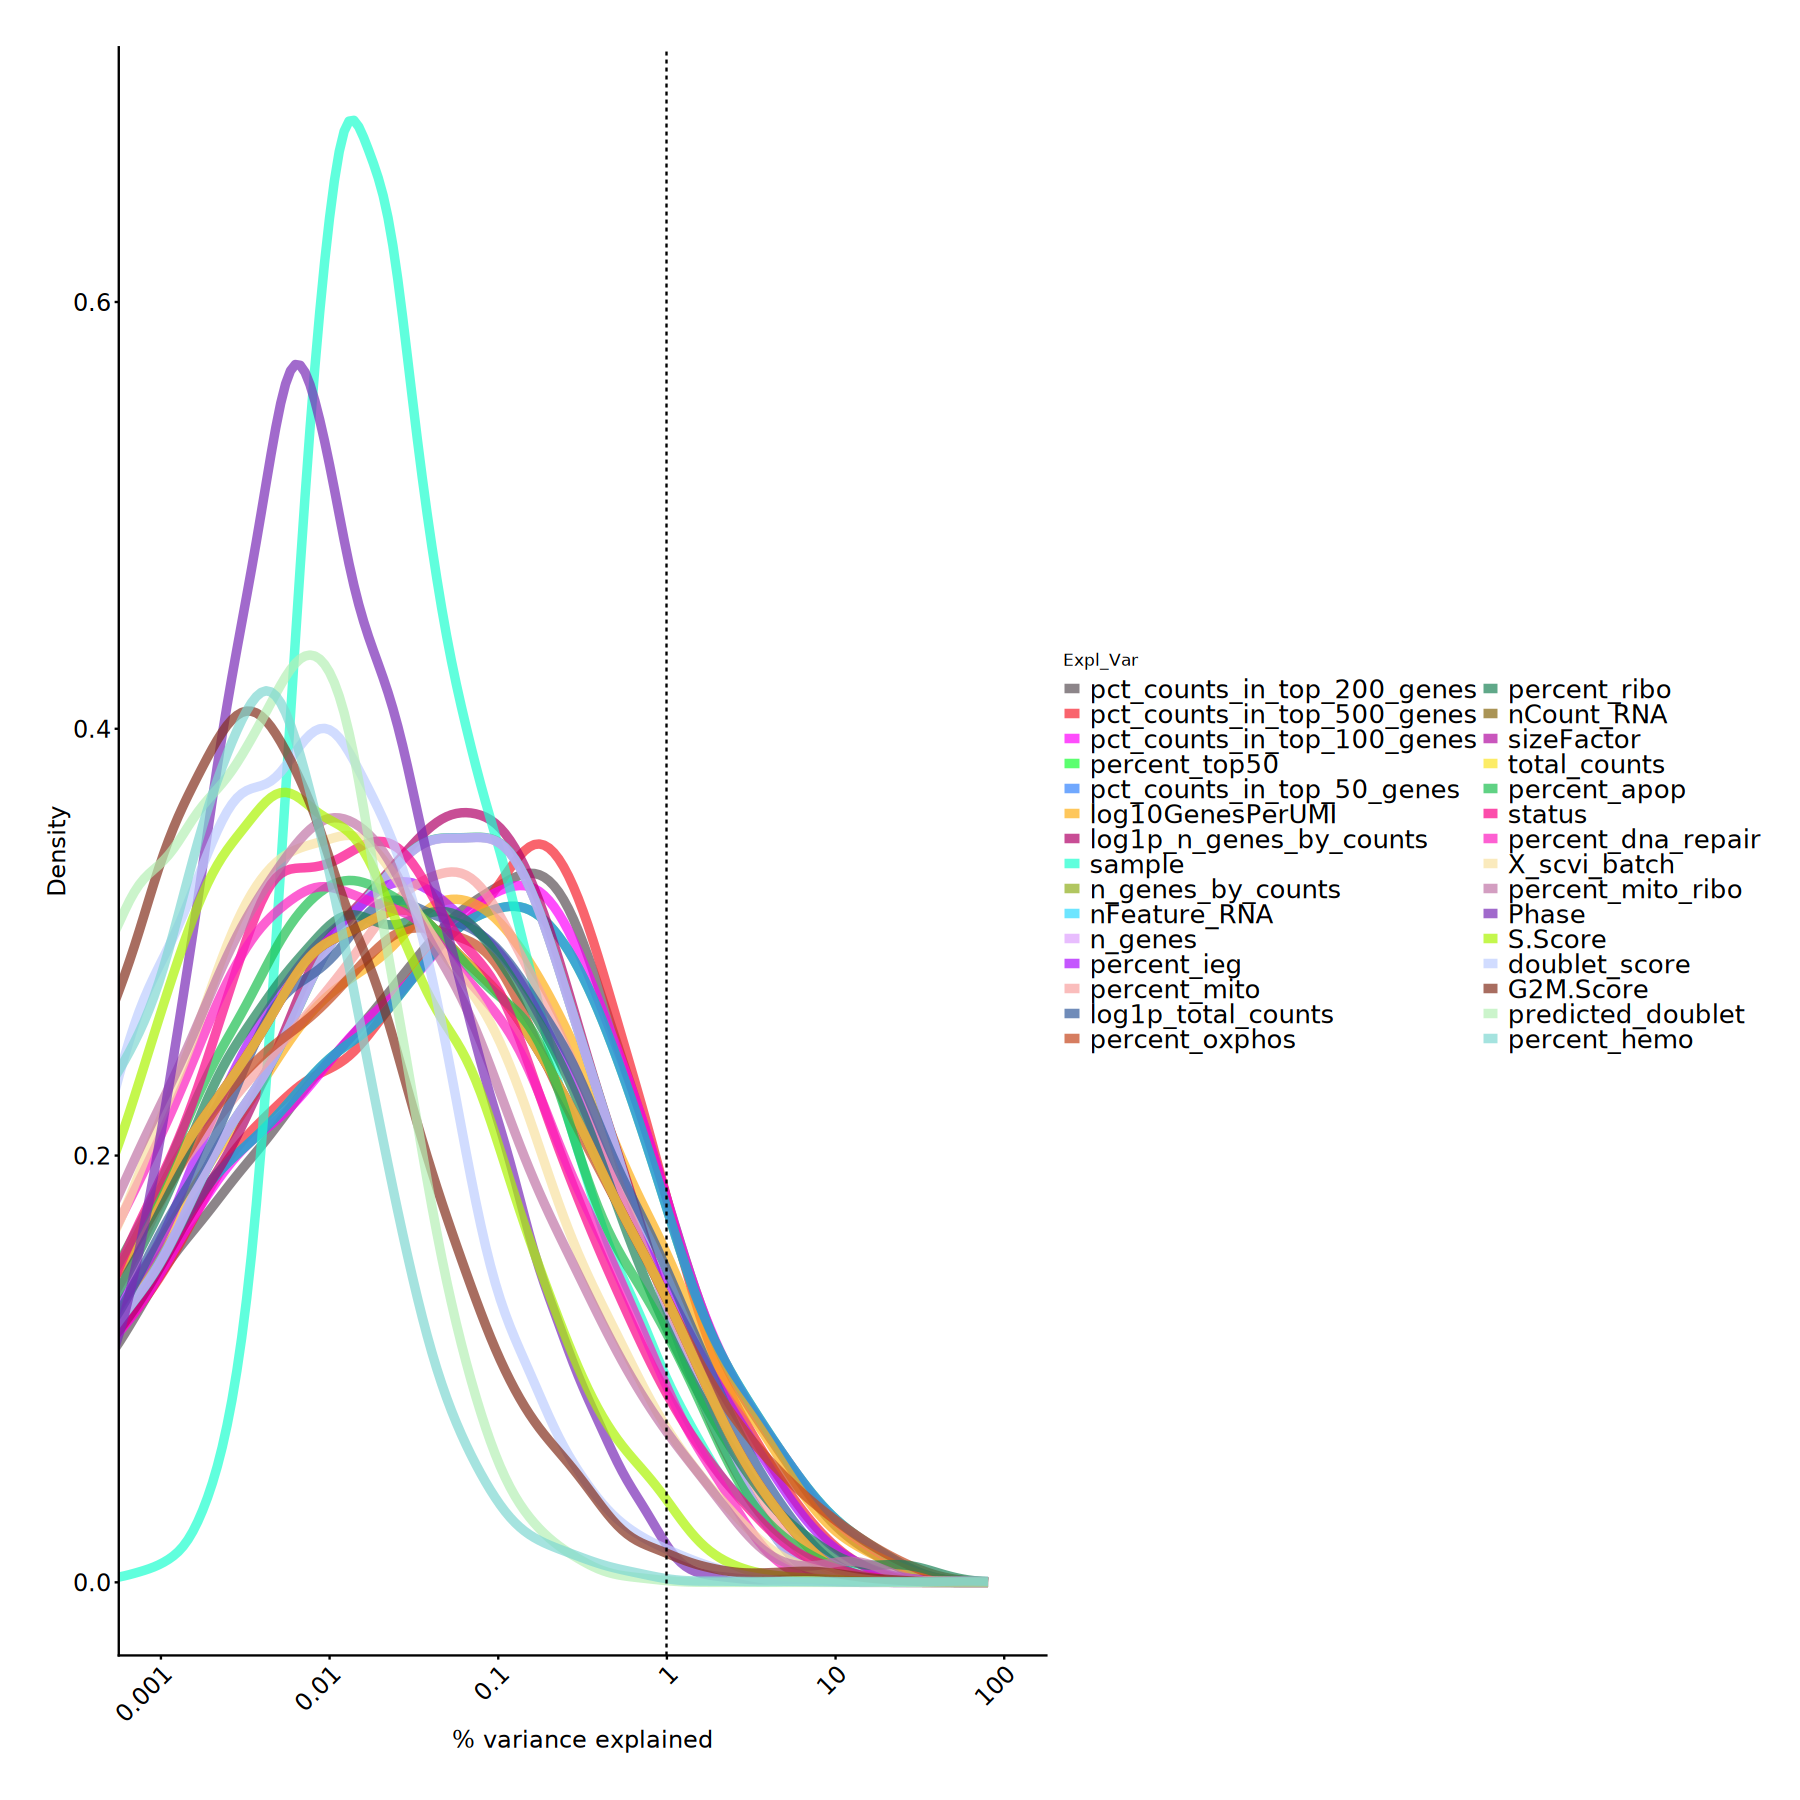

In [78]:
# view top 10:

scater::plotExplanatoryVariables(vars, nvars_to_plot = Inf) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

In [75]:
# according to chatGPT, the plotting function log10-transformes the R^2 values
# that range between 0 (0 variance) to 1 (100 % variance). It plots these
# transformed values. However, at x axis, it labels the ticks with the actual 
# untransformed R^2 values. Therefore, x = 1 means the 100 % of variance explained.
# More than this likely shows overfitting of the models or some other issues.

In [76]:
# log10 transfromation enables a more interpretable view by compressing
# the curve around short variance values and allow to distinguish higher
# variance values. 

In [79]:
# X-axis (Horizontal): % variance explained - This axis represents the percentage of variance
# in the data that is explained by each feature.  It's on a logarithmic scale 
# (notice the uneven spacing: 0.001, 0.01, 0.1, 1, 10, 100).  Logarithmic scales 
# are used when data spans several orders of magnitude, 
# making it easier to visualize both small and large values.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


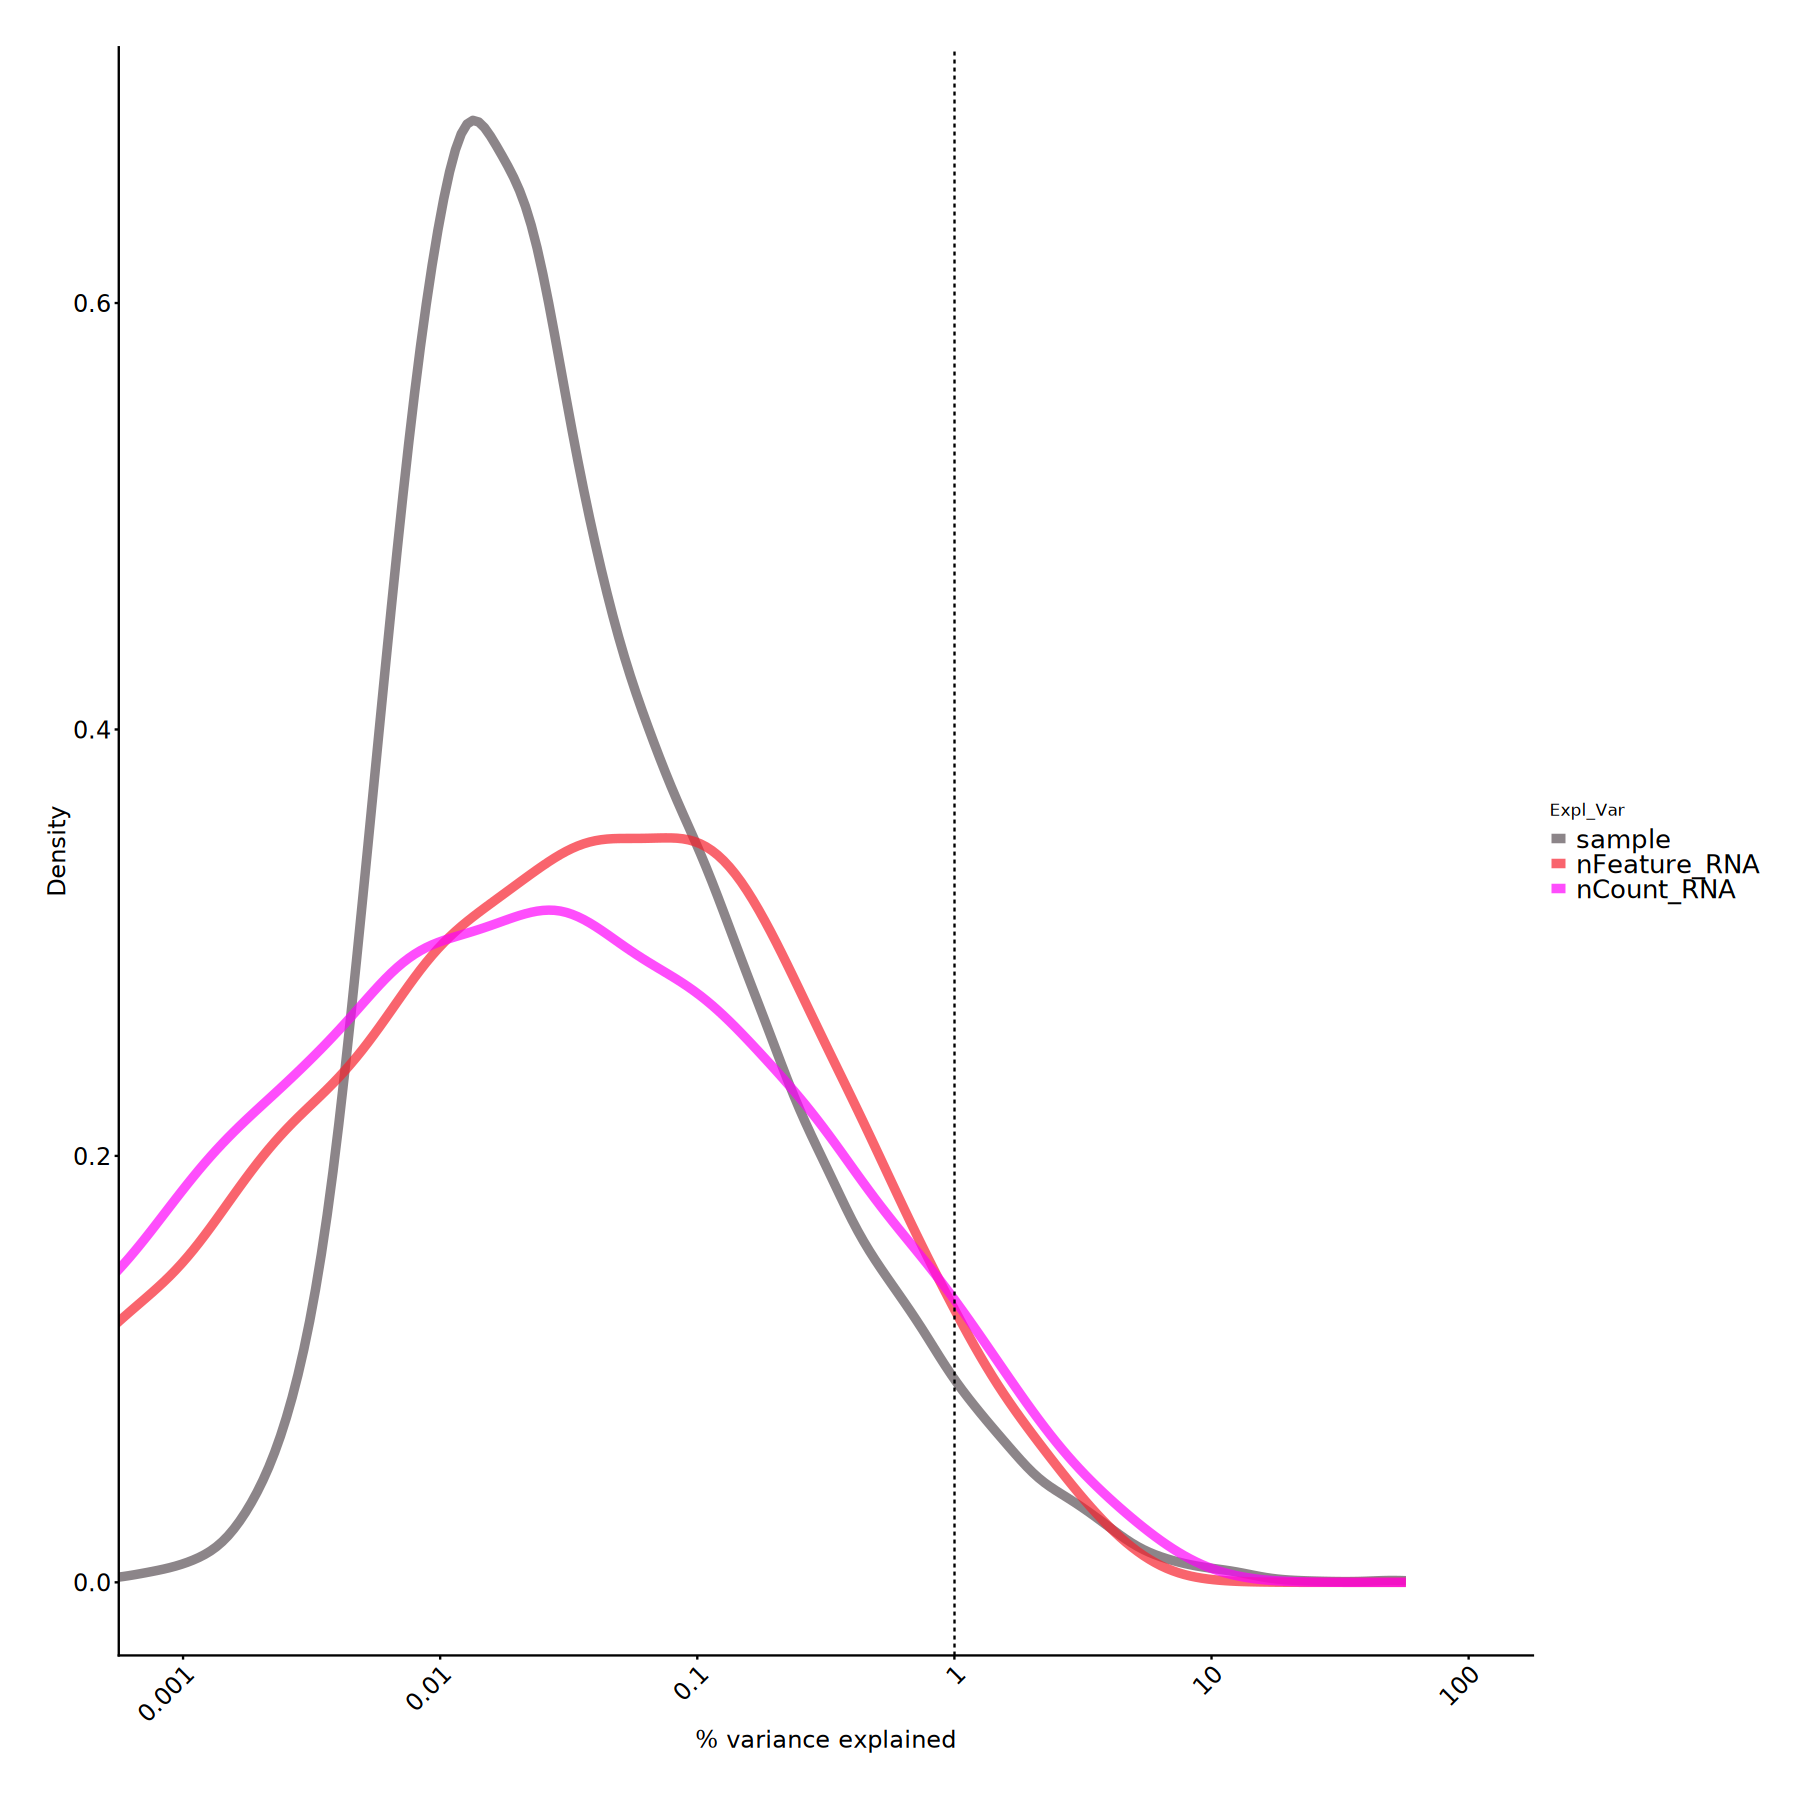

In [87]:
# view top 10:

scater::plotExplanatoryVariables(vars[, c('nFeature_RNA', 'nCount_RNA', 'sample')], nvars_to_plot = Inf) + 
ggplot2::scale_color_manual(values = my_colours) +
my_theme + my_margin

In [89]:
dec <- scran::modelGeneVar(zheng_et_al_sce)

In [105]:
options(repr.plot.width = 10, repr.plot.height = 5)

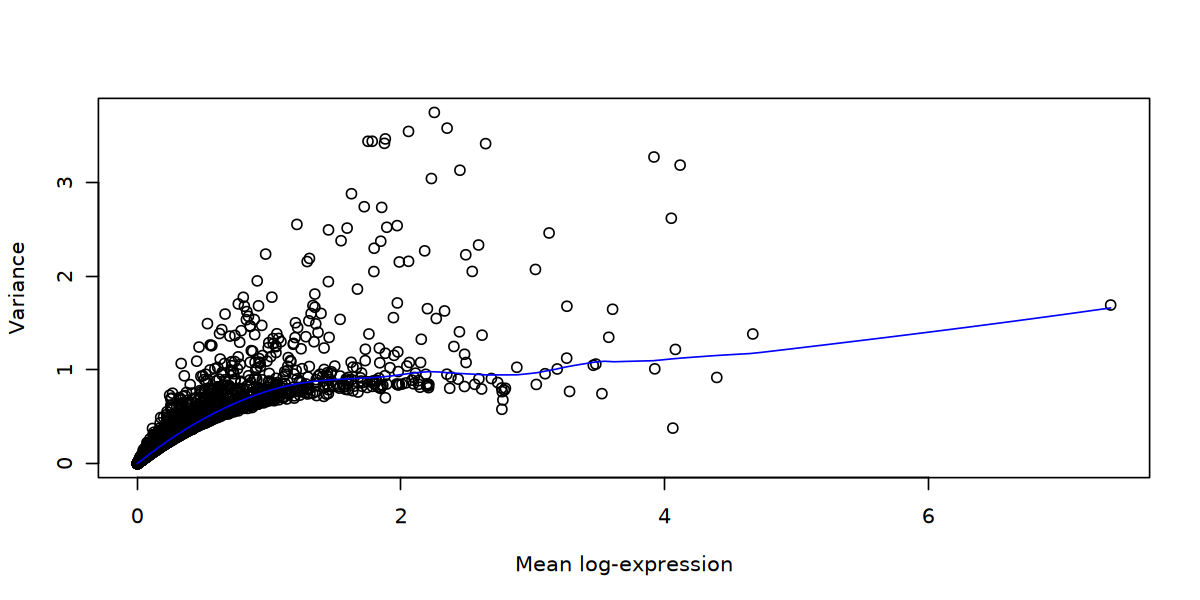

In [106]:
plot(dec$mean, dec$total, xlab="Mean log-expression", ylab="Variance")
curve(S4Vectors::metadata(dec)$trend(x), col="blue", add=TRUE)

In [124]:
# ggplot2 version of the same plot:

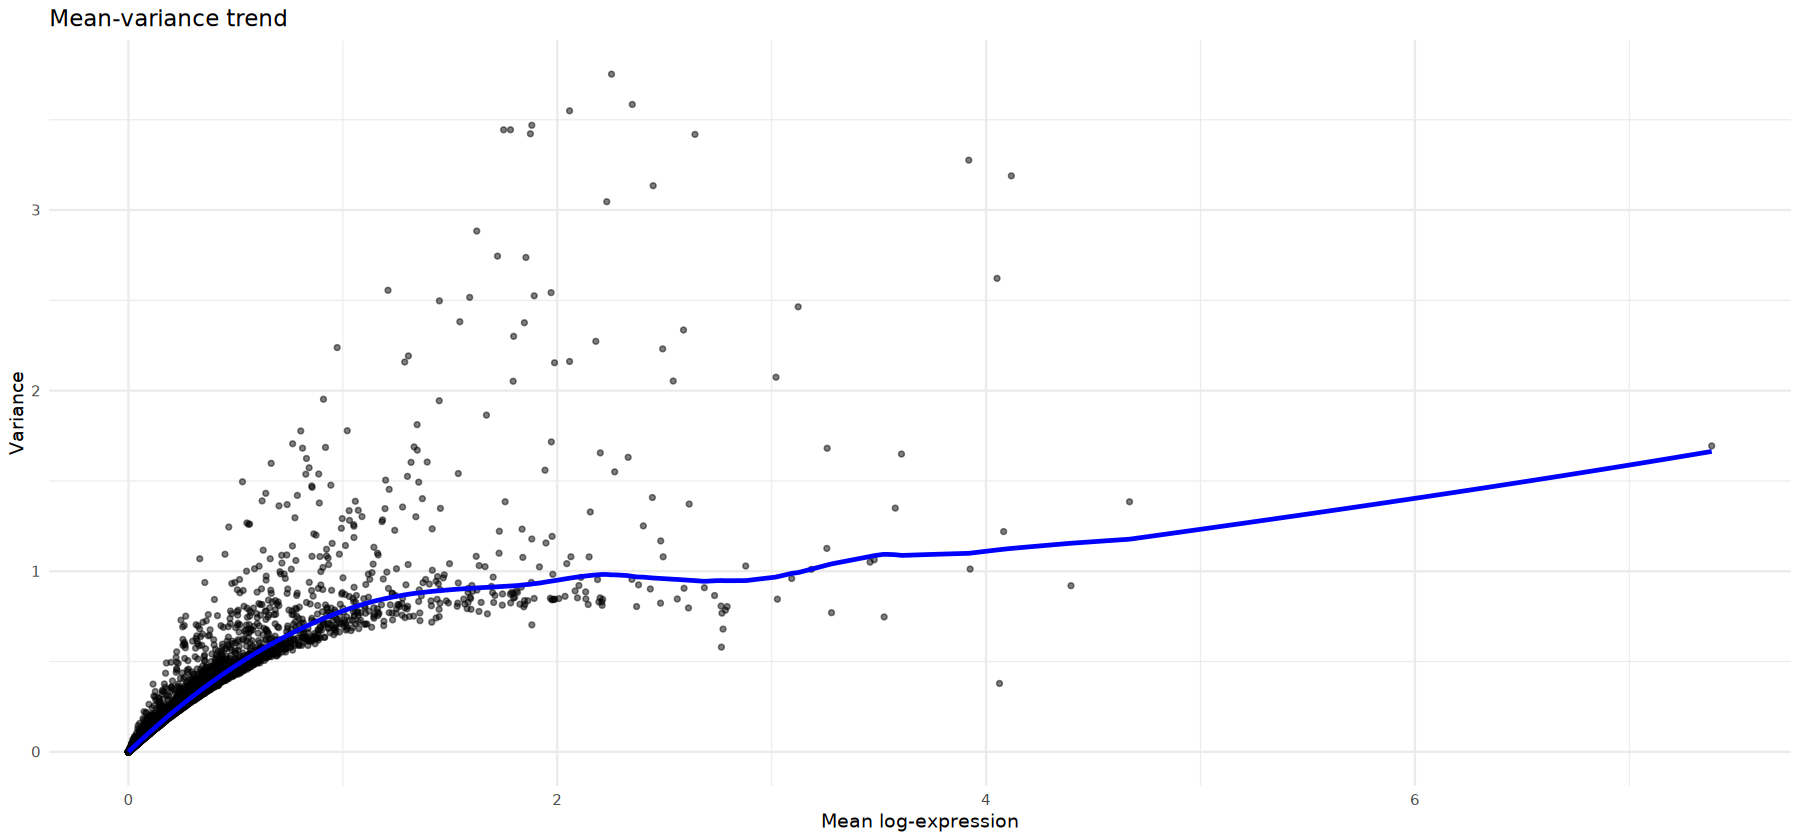

In [125]:
# Build base data frame
df <- data.frame(
  mean = dec$mean,
  total = dec$total,
  gene = rownames(dec)
)

# Generate smoothed trend from metadata
trend_fun <- S4Vectors::metadata(dec)$trend
x_grid <- seq(min(df$mean), max(df$mean), length.out = 500)
trend_df <- data.frame(
  mean = x_grid,
  fitted = trend_fun(x_grid)
)

# Create the plot using fully qualified ggplot2 functions
ggplot2::ggplot(df, ggplot2::aes(x = mean, y = total)) +
  ggplot2::geom_point(alpha = 0.5, size = 1) +
  ggplot2::geom_line(data = trend_df, ggplot2::aes(x = mean, y = fitted),
                     color = "blue", linewidth = 1) +
  ggplot2::labs(
    x = "Mean log-expression",
    y = "Variance",
    title = "Mean-variance trend"
  ) +
  ggplot2::theme_minimal()

In [126]:
# Identify top 10 genes with highest deviation from trend
expected <- trend_fun(df$mean)
df$residual <- df$total - expected
top_genes <- df[order(df$residual, decreasing = TRUE)[1:20], ]

In [127]:
p1 <- # Create the plot using fully qualified ggplot2 functions
ggplot2::ggplot(df, ggplot2::aes(x = mean, y = total)) +
  ggplot2::geom_point(alpha = 0.5, size = 1) +
  ggplot2::geom_line(data = trend_df, ggplot2::aes(x = mean, y = fitted),
                     color = "blue", linewidth = 1) +
  ggplot2::labs(
    x = "Mean log-expression",
    y = "Variance",
    title = "Mean-variance trend"
  ) +
  ggplot2::theme_minimal()

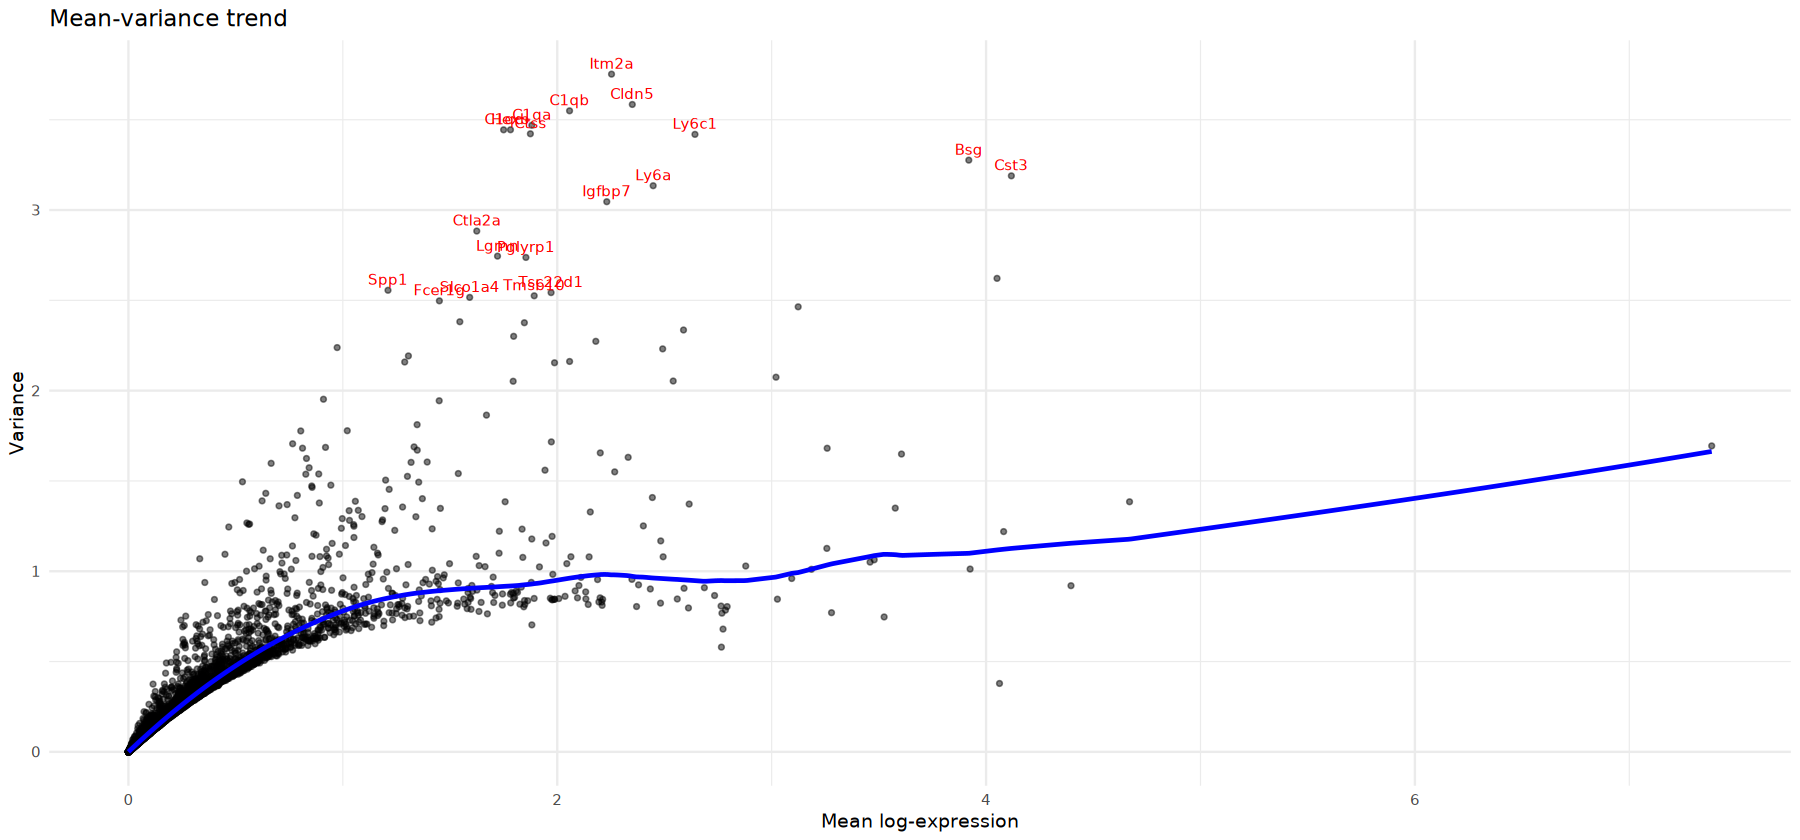

In [128]:
p1 + ggplot2::geom_text(data = top_genes,
                       ggplot2::aes(label = gene),
                       vjust = -0.5, size = 3, color = "red")

In [129]:
options(repr.plot.width = 15, repr.plot.height = 7)

In [130]:
# more readable:

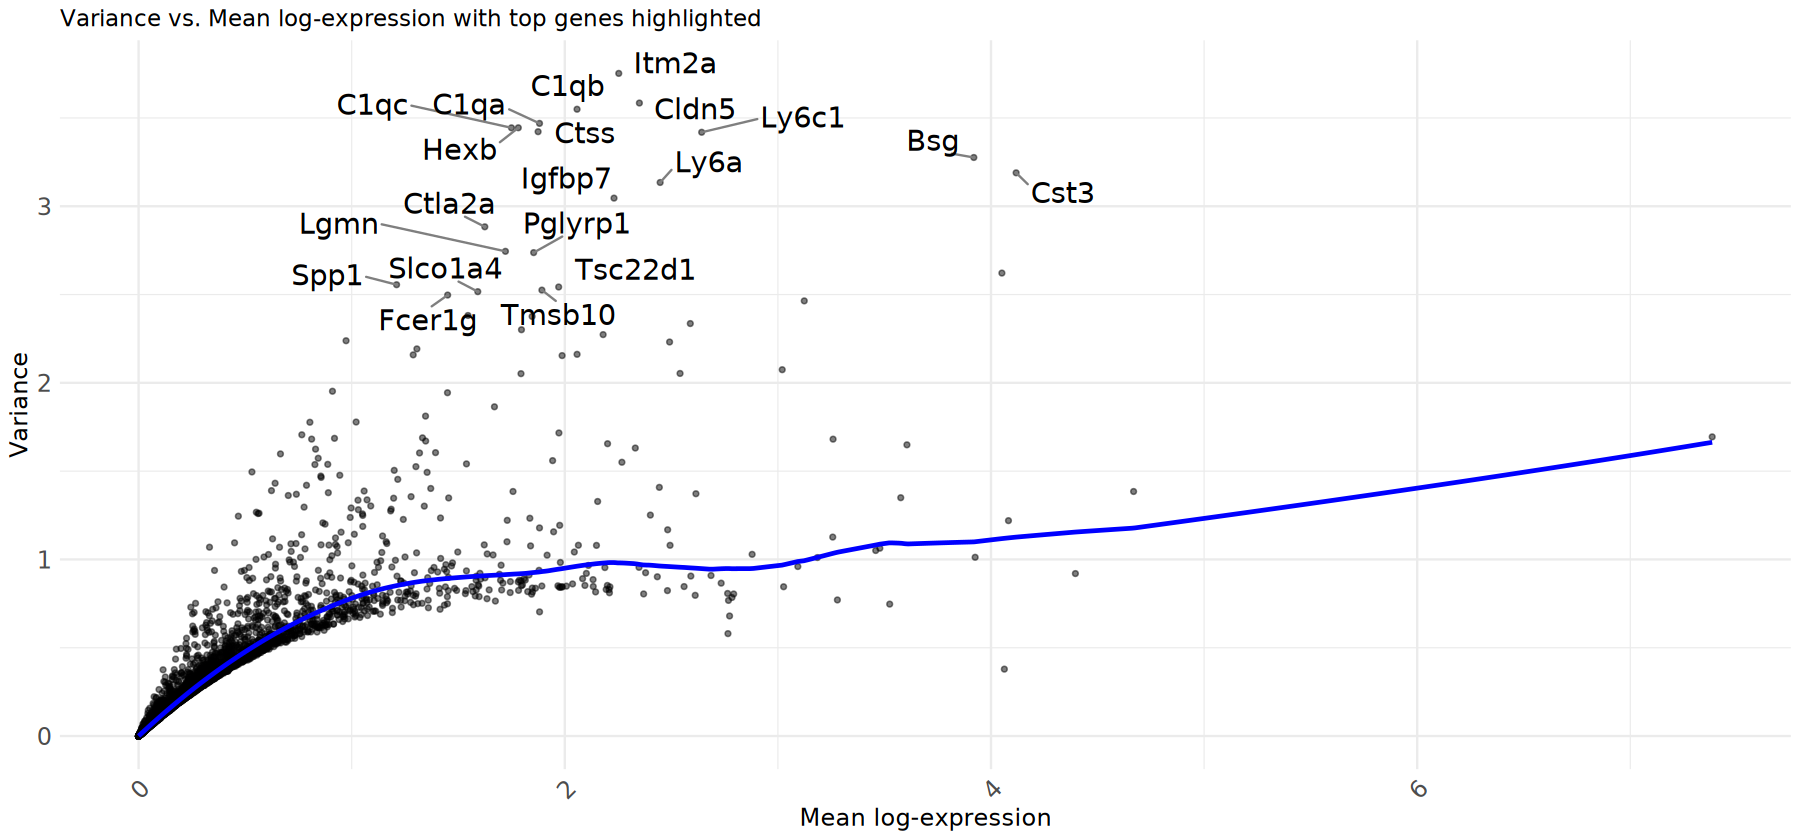

In [131]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)

# Base data frame
df <- data.frame(
  mean = dec$mean,
  total = dec$total,
  gene = rownames(dec)
)

# Compute expected variance from trend
trend_fun <- S4Vectors::metadata(dec)$trend
df$expected <- trend_fun(df$mean)
df$residual <- df$total - df$expected

# Identify top N genes above the trend
top_n <- 20
top_genes <- df[order(df$residual, decreasing = TRUE)[1:top_n], ]

# Create smoothed trend line data
x_grid <- seq(min(df$mean), max(df$mean), length.out = 500)
trend_df <- data.frame(
  mean = x_grid,
  fitted = trend_fun(x_grid)
)

# Final ggplot
ggplot2::ggplot(df, ggplot2::aes(x = mean, y = total)) +
  ggplot2::geom_point(alpha = 0.5, size = 1) +
  ggplot2::geom_line(data = trend_df,
                     ggplot2::aes(x = mean, y = fitted),
                     color = "blue", linewidth = 1) +
  ggrepel::geom_text_repel(data = top_genes,
                           ggplot2::aes(label = gene),
                           size = 6, max.overlaps = Inf, box.padding = 0.5,
                           segment.color = "grey50") +
  ggplot2::labs(
    x = "Mean log-expression",
    y = "Variance",
    title = "Variance vs. Mean log-expression with top genes highlighted"
  ) +
  ggplot2::theme_minimal() + my_theme

In [132]:
# Examine the distribution of continous variables across cells from different samples:

In [133]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggrepel_0.9.6      ggplot2_3.5.1      magrittr_2.0.3     Seurat_5.1.0      
[5] SeuratObject_5.0.2 sp_2.1-4          

loaded via a namespace (and not attached):
  [1] RcppAnnoy_0.0.22            splines_4.4.2              
  [3] later_1.3.2                 pbdZMQ_0.3-11          